<a href="https://colab.research.google.com/github/yunions/Statistics/blob/master/03_2%EC%B0%A8%EC%9B%90_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/yunions/Statistics.git

Cloning into 'Statistics'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 2), reused 17 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


# 03. 2차원 데이터의 정리

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## (3) 앤스컴의 예  
동일해 보이는 지표를 가진 데이터라도 시각화 후 전혀 다른 데이터임을 확인할 수 있음  
**시각화의 중요성과 특이치 및 주영향관측값의 영향**을 보여주는 대표적인 예

In [4]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe_data = np.load('/content/Statistics/data/ch3_anscombe.npy') #load 는 .npy나 .npz 형식의 파일을 읽는 코드이다.
print(anscombe_data.shape) #데이터가 네가지 들어있고, 각각11개의 2차원 데이터다.

(4, 11, 2)


In [5]:
anscombe_data

array([[[10.  ,  8.04],
        [ 8.  ,  6.95],
        [13.  ,  7.58],
        [ 9.  ,  8.81],
        [11.  ,  8.33],
        [14.  ,  9.96],
        [ 6.  ,  7.24],
        [ 4.  ,  4.26],
        [12.  , 10.84],
        [ 7.  ,  4.82],
        [ 5.  ,  5.68]],

       [[10.  ,  9.14],
        [ 8.  ,  8.14],
        [13.  ,  8.74],
        [ 9.  ,  8.77],
        [11.  ,  9.26],
        [14.  ,  8.1 ],
        [ 6.  ,  6.13],
        [ 4.  ,  3.1 ],
        [12.  ,  9.13],
        [ 7.  ,  7.26],
        [ 5.  ,  4.74]],

       [[10.  ,  7.46],
        [ 8.  ,  6.77],
        [13.  , 12.74],
        [ 9.  ,  7.11],
        [11.  ,  7.81],
        [14.  ,  8.84],
        [ 6.  ,  6.08],
        [ 4.  ,  5.39],
        [12.  ,  8.15],
        [ 7.  ,  6.42],
        [ 5.  ,  5.73]],

       [[ 8.  ,  6.58],
        [ 8.  ,  5.76],
        [ 8.  ,  7.71],
        [ 8.  ,  8.84],
        [ 8.  ,  8.47],
        [ 8.  ,  7.04],
        [ 8.  ,  5.25],
        [19.  , 12.5 ],
        [ 

In [16]:
#4개의 데이터의 평균, 분산, 상관계수, 회귀직선 계산
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])

for i, data in enumerate(anscombe_data): # 각 데이터셋을 순서대로 튜플로 전환(ex. 0번째 ndarray -> 데이터 튜플로 전환)
    dataX = data[:, 0] #모든 튜블의 0번자리 값
    dataY = data[:, 1] #모든 튜블의 1번자리 값
    #print(i, data, dataX, dataY)
    poly_fit = np.polyfit(dataX, dataY, 1) #0번자리와 1번자리 좌표 기준으로 1차식 직선 계산(회귀식) -> araay형식으로 데이터 저장
    #print(poly_fit)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[0]:.2f}x+{poly_fit[1]:.2f}']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,0.50x+3.00,0.50x+3.00,0.50x+3.00,0.50x+3.00


위의 결과에 따라서 4개의 data셋의 지표가 모두 동일함을 확인할 수 있다

 
0.5001 x + 3
 
0.5 x + 3.001
 
0.4997 x + 3.002
 
0.4999 x + 3.002


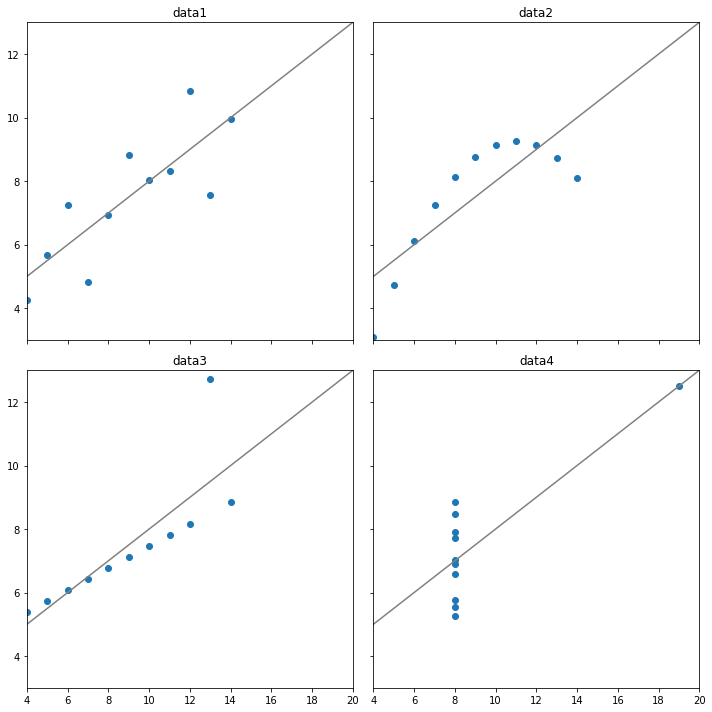

In [30]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)

for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1) #회귀직선 계산
    poly_1d = np.poly1d(poly_fit) #array값으로 함수(function) 생성
    print(poly_1d)
    ys = poly_1d(xs) #x값(xs)으로 y값(ys) 계산
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()